In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def get_relevant_info_text(df_row):
    df = df_row
    relevant_info = {}
    if df["method"] == "PQK":
        relevant_info["CI_num_layers"] = df["CI_num_layers"]
        relevant_info["CI_num_qubits"] = df["CI_num_qubits"]
        relevant_info["CI_encoding_circuit_label"] = df["CI_encoding_circuit_label"]
        relevant_info["gamma"] = df["gamma"]
    elif df["method"] == "FQK":
        relevant_info["CI_num_layers"] = df["CI_num_layers"]
        relevant_info["CI_num_qubits"] = df["CI_num_qubits"]
        relevant_info["CI_encoding_circuit_label"] = df["CI_encoding_circuit_label"]
    elif df["method"] == "classical_RBF":
        relevant_info["gamma"] = df["gamma"]
    return relevant_info


def get_relevant_info_text(df_row):
    df = df_row
    text = ""
    if df["method"] == "PQK":
        text += f"L: {df['CI_num_layers']}, "
        text += "$n_{qubits}$" +f": {df['CI_num_qubits']}, "
        text += f"$\gamma$:  {np.round(df['gamma'], 3)}, "
        text += f"fmap: {df['CI_encoding_circuit_label'][:-7]}"
    elif df["method"] == "FQK":
        text += f"L: {df['CI_num_layers']}, "
        text += "$n_{qubits}$" +f": {df['CI_num_qubits']}, "
        text += f"fmap: {df['CI_encoding_circuit_label'][:-7]}"
    elif df["method"] == "classical_RBF":
        text += f"$\gamma$: {np.round(df['gamma'], 3)}"
    return text

        

In [4]:

def solution_of_g_paper(x):
        """
        df/dx = -lamb * np.exp(-lamb * x * k) * np.sin(lamb * x) - lamb * k * f

        solution: f(x) = np.exp(-lamb * x * k) * np.cos(lamb * x), f(0) = 1
        """
        lamb = 20
        k = 0.1
        return np.exp(-lamb * x * k) * np.cos(lamb * x) 

def solution_of_g_exp(x):
    """
    df/dx = lamb * np.exp(f * k) 
    f(0.001) = np.log(0.001)

    solution: f(x) = np.log(x)
    """
    return np.log(x)

def solution_of_g_exp_2(x):
    """
    df/dx = 2*f+4*cos(x)-8*sin(x), f(0) = 3

    solution: f(x) = 3*exp(2*x) + 4*sin(x)
    """
    return 3*np.exp(2*x) + 4*np.sin(x)



In [11]:
path_to_results = "../data/results/DE_3_7"
results_PQK = load_feather_folder_as_pd(path_to_results)
#order result by smallest mse 

results_PQK = results_PQK.sort_values(by="mse")

0.1020514965057373


In [15]:
results_PQK

,f_sol,optimal_alpha,mse,CI_encoding_circuit_label,CI_num_qubits,CI_num_layers
197,"[[-0.0003300292182995164, -0.00032944956309105...",0,6.539960e-08,HardwareEfficientEmbeddingCircuit_qiskit,2,1
266,"[[-0.0003300292182995164, -0.00032944956309105...",0,6.539960e-08,HardwareEfficientEmbeddingCircuit_qiskit,2,1
135,"[[-0.0003300292182995164, -0.00032944956309105...",0,6.539960e-08,HardwareEfficientEmbeddingCircuit_qiskit,2,1
242,"[[-0.0003300292182995164, -0.00032944956309105...",0,6.539960e-08,HardwareEfficientEmbeddingCircuit_qiskit,2,1
219,"[[-0.0003300292182995164, -0.00032944956309105...",0,6.539960e-08,HardwareEfficientEmbeddingCircuit_qiskit,2,1
...,...,...,...,...,...,...
62,"[[-0.34777395398678285, -0.3271086848689396, -...",0,5.393152e-03,HardwareEfficientEmbeddingCircuit_qiskit,2,1
48,"[[-0.34777395398678285, -0.3271086848689396, -...",0,5.393152e-03,HardwareEfficientEmbeddingCircuit_qiskit,2,1
23,"[[-0.34777395398678285, -0.3271086848689396, -...",0,5.393152e-03,HardwareEfficientEmbeddingCircuit_qiskit,2,1
235,"[[-0.34777395398678285, -0.3271086848689396, -...",0,5.393152e-03,HardwareEfficientEmbeddingCircuit_qiskit,2,1


In [16]:

def f_derivatives_2ODE(f, x_span):
    """
    f'(x) = f'(x)
    f''(x) = f(x)
    """
    return [f[1], -f[0]]

x_span = np.linspace(0.0001, 2*3.14, 50)
f_initial_vec = np.array([0, 1])

f_odeint = odeint(f_derivatives_2ODE, f_initial_vec, x_span)

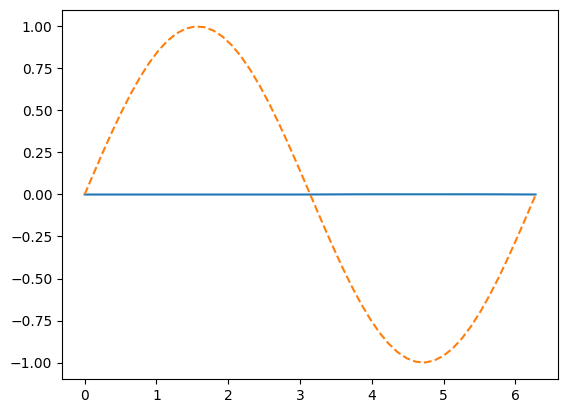

In [17]:
plt.plot(x_span, results_PQK.iloc[0]["f_sol"][0])
plt.plot(x_span, np.sin(x_span), "--")
#plt.plot(x_span, f_odeint[:, 0])




In [9]:
results_PQK["gamma"] = np.sqrt(0.5*1/results_PQK["sigma"])
results_PQK["analytical_solution"] = results_PQK["g_name"].apply(lambda x: analytical_solutions[x])
results_PQK["mse_with_analytical"] = results_PQK.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)
results_PQK = results_PQK.sort_values(by="mse_with_analytical")



KeyError: 'sigma'

In [ ]:
path_to_results = "../data/results/DE_2_5"
results_RBF = load_feather_folder_as_pd(path_to_results)
results_RBF["gamma"] = np.sqrt(0.5*1/results_RBF["sigma"])
results_RBF = results_RBF.sort_values(by="mse")
results_RBF["analytical_solution"] = results_RBF["g_name"].apply(lambda x: analytical_solutions[x])
results_RBF["mse_with_analytical"] = results_RBF.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)

0.005984783172607422


In [ ]:
path_to_results = "../data/results/DE_2_4"
results_FQK = load_feather_folder_as_pd(path_to_results)
results_FQK = results_FQK.sort_values(by="mse")
results_FQK["analytical_solution"] = results_FQK["g_name"].apply(lambda x: analytical_solutions[x])
results_FQK["mse_with_analytical"] = results_FQK.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)


0.009935379028320312


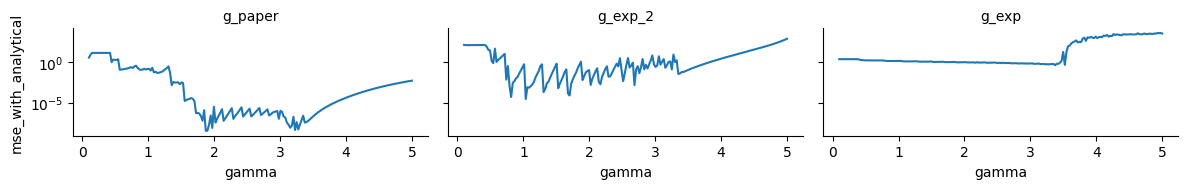

In [ ]:
import seaborn as sns

g = sns.relplot(x="gamma", y="mse_with_analytical", 
                data=results_RBF.drop_duplicates(subset=["gamma", "g_name"]),
                kind="line", 
                col="g_name", 
                height=2,  # Adjust the height as needed
                aspect=2  
                )
g.set_titles("{col_name}")
g.set(yscale="log") 

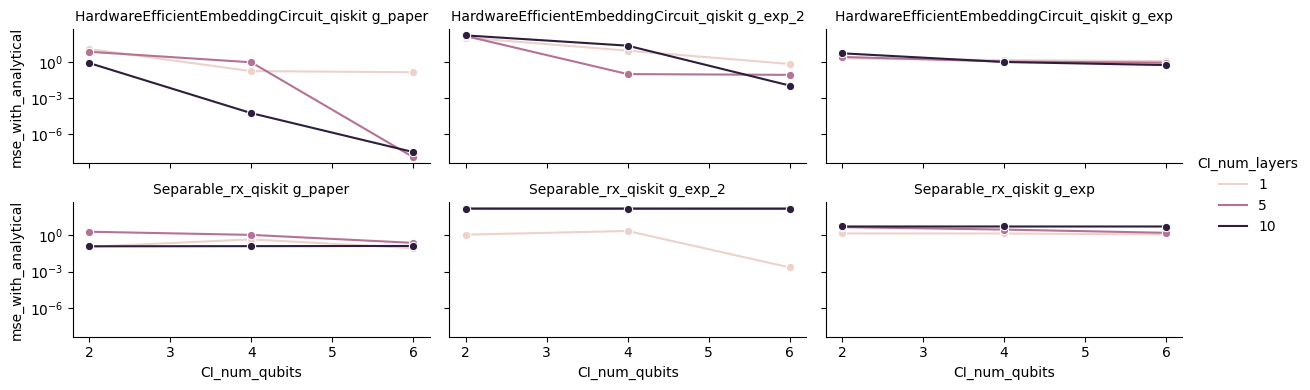

In [ ]:
import seaborn as sns

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_FQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"]),
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o"
                )
g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

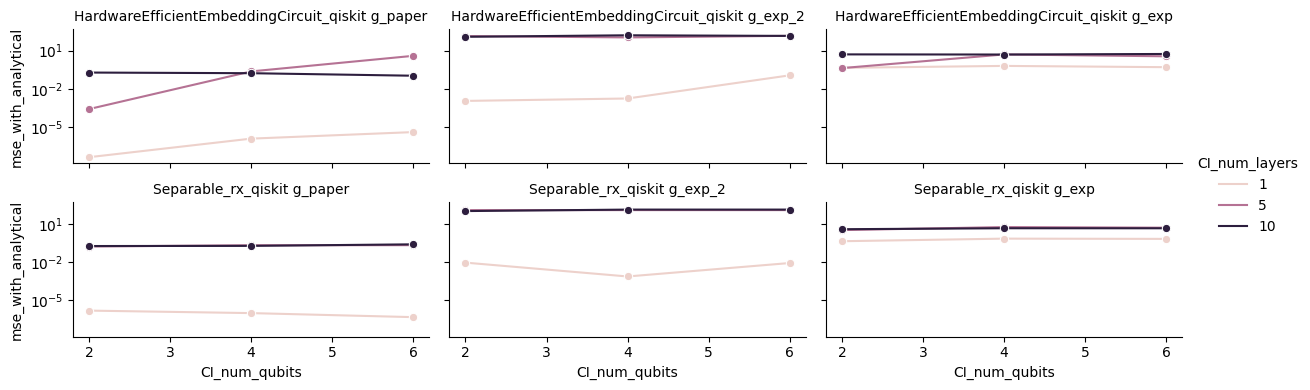

In [ ]:
import seaborn as sns

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_PQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"]),
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o"
                )
g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

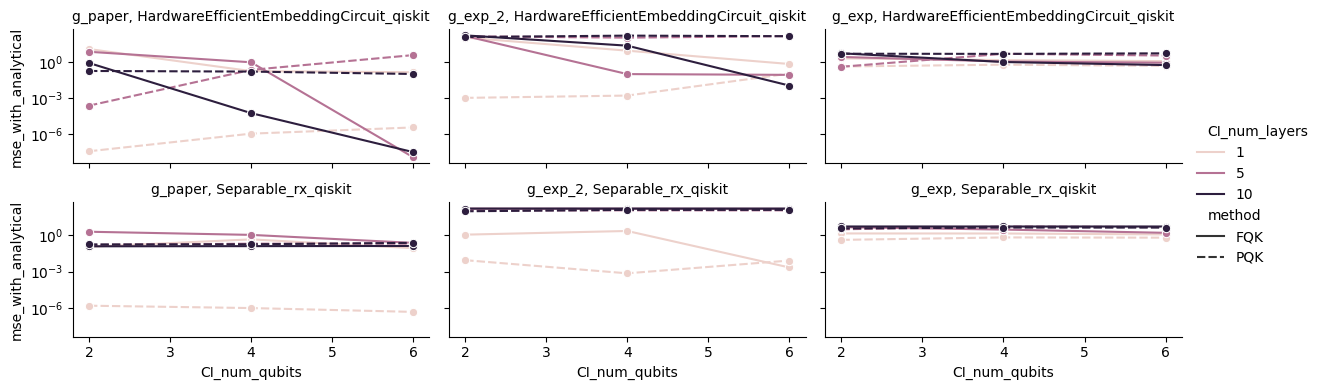

In [ ]:
import seaborn as sns

results_FQK_plot = results_FQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"])
results_PQK_plot = results_PQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"])

#merge the results
results_QK_plot = pd.concat([results_FQK_plot, results_PQK_plot])

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_QK_plot,
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                style="method"
                )
g.set_titles("{col_name}, {row_name}")
g.set(yscale="log") 

In [ ]:
results_FQK.head()

,f_sol,optimal_alpha,mse,CI_encoding_circuit_label,CI_num_qubits,CI_num_layers,sigma,method,g_name,f_initial,analytical_solution,mse_with_analytical
7,"[1.000077584832995, 0.8268039776895315, 0.4664...","[-2.3682734401314662, -30.847692307992368, 50....",4.646898e-10,HardwareEfficientEmbeddingCircuit_qiskit,6,5,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",1.268182e-08
8,"[1.0000170462082871, 0.8271406096271257, 0.466...","[-1.2457889029334712, 2.95542879125854, 4.2799...",5.172854e-09,HardwareEfficientEmbeddingCircuit_qiskit,6,10,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",3.361295e-08
5,"[1.0148102801599297, 0.840660210421726, 0.4800...","[-9.544363055979394, -43.43622492976331, 38.49...",4.230039e-05,HardwareEfficientEmbeddingCircuit_qiskit,4,10,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",5.820548e-05
15,"[0.7928179823528296, 0.4966990212113558, 0.253...","[-193.48170346575822, 5290.133572045253, 1982....",3.640265e-04,Separable_rx_qiskit,6,1,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",8.785769e-02
51,"[2.9873424946360814, 3.246169499617494, 3.5146...","[78.46417431592293, -2485.380774880659, -827.5...",1.391312e-03,Separable_rx_qiskit,6,1,0,FQK,g_exp_2,3.0,"[3.0010000600033337, 3.2614171494104096, 3.530...",2.182970e-03


<Axes: >

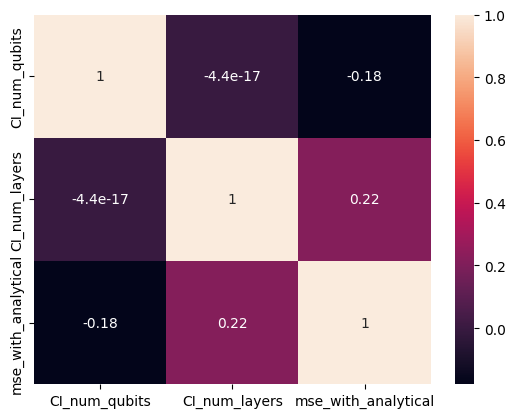

In [ ]:
sns.heatmap(results_FQK[['CI_num_qubits', 'CI_num_layers', 'mse_with_analytical']].corr(method="pearson"), annot=True)

<Axes: >

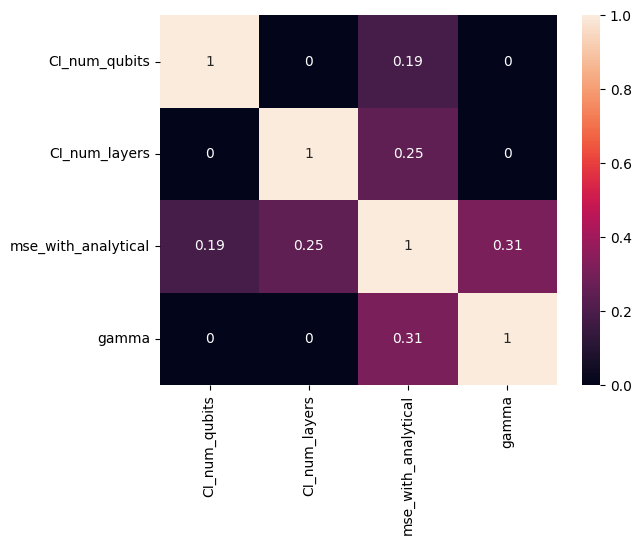

In [ ]:
corr = results_PQK[['CI_num_qubits', 'CI_num_layers', 'mse_with_analytical', 'gamma']].corr(method="spearman") 
sns.heatmap(corr, annot=True)

Text(1.1, 0.1, '$\\gamma$: 1.922')

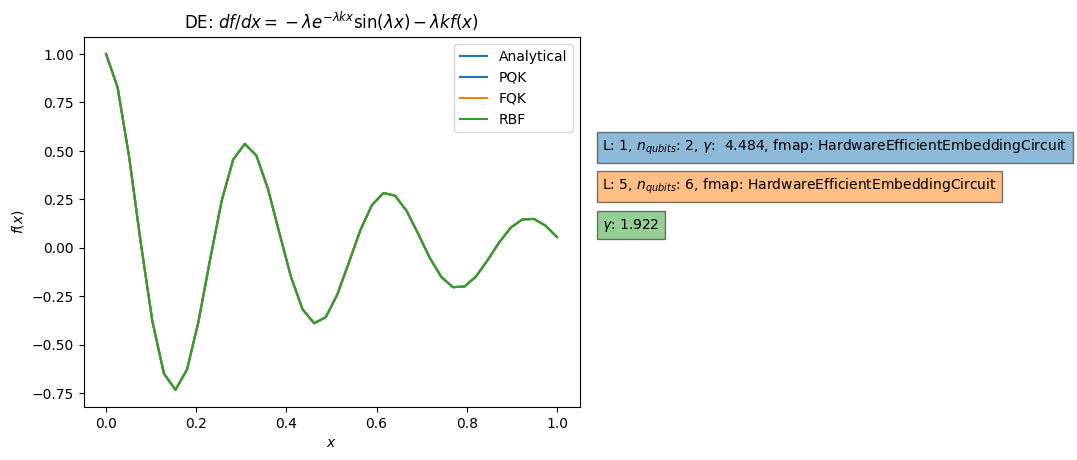

In [ ]:
#result with lowest mse
g_name_to_plot = "g_paper"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = -\lambda e^{-\lambda kx } \sin(\lambda x) - \lambda k f(x)$") 
                 


plt.legend()



#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.5, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.3, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.1, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))



Text(1.1, 11, '$\\gamma$: 0.814')

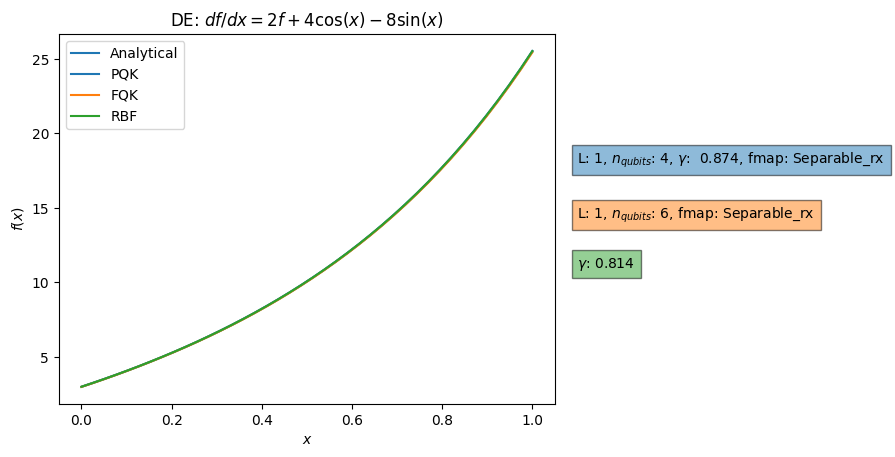

In [ ]:
#result with lowest mse
g_name_to_plot = "g_exp_2"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")
plt.legend()

#print details of the best result

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = 2f + 4\cos(x) - 8\sin(x)$")


#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 18, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 14.3, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 11, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))



Text(1.1, -6, '$\\gamma$: 3.252')

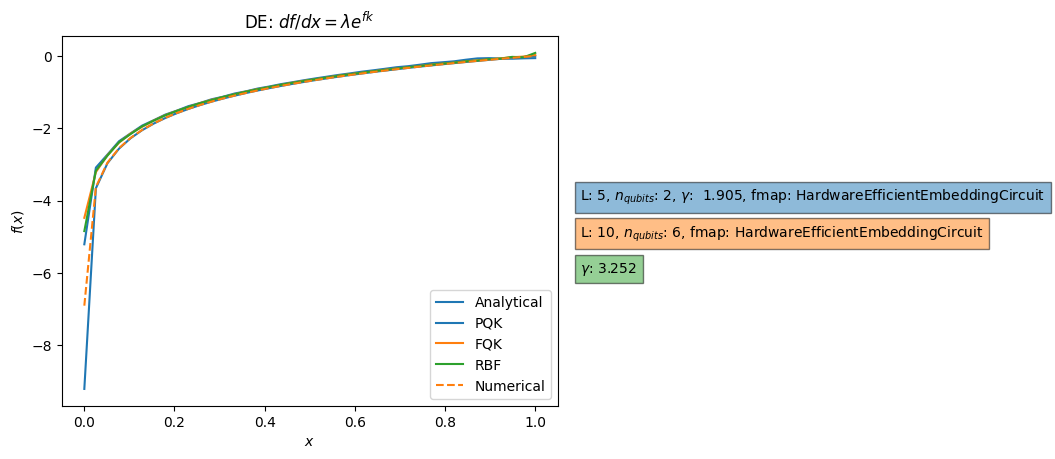

In [ ]:
#result with lowest mse
g_name_to_plot = "g_exp"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")
plt.plot(x_span, numerical_solutions[g_name_to_plot], label="Numerical", linestyle="--")

plt.legend()


plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = \lambda e^{f k}$")


#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -4, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -5, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -6, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))


In [ ]:
from circuits.circuits import * 
from utils.rbf_kernel_tools import *

from solvers.MMR.PQK_solver import PQK_solver
from solvers.MMR.FQK_solver import FQK_solver
from solvers.MMR.kernel_solver import Solver


def get_K_from_row(row, method, executor_type):
    """Get the K matrix from a row in the results dataframe
    """
    x_span = np.linspace(0.0001, 1, 40)

    print(row["CI_encoding_circuit_label"])
    circuit_information = {"num_qubits": row["CI_num_qubits"],
                            "num_layers": row["CI_num_layers"],
                            "encoding_circuit": circuits_dictionary_qiskit[row["CI_encoding_circuit_label"]]
                            }
    print(circuit_information)
    if method == "PQK":
        O_Solver = PQK_solver(circuit_information, executor_type, envelope={"function": rbf_kernel_manual, 
                                            "derivative_function": analytical_derivative_rbf_kernel, 
                                            "sigma": row["sigma"]})
    elif method == "FQK":
        O_Solver = FQK_solver(circuit_information, executor_type)
    elif method == "classical_RBF":
        O_Solver = Solver(circuit_information)

    
    
    return O_Solver.get_Kernel(x_span)

In [ ]:
best_K_PQK = get_K_from_row(results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0], "PQK", Executor("statevector_simulator"))
worst_K_PQK = get_K_from_row(results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[-1], "PQK", Executor("statevector_simulator"))

HardwareEfficientEmbeddingCircuit_qiskit
{'num_qubits': 2, 'num_layers': 5, 'encoding_circuit': <function HardwareEfficientEmbeddingCircuit_qiskit at 0x000002B0D920BAC0>}
HardwareEfficientEmbeddingCircuit_qiskit
{'num_qubits': 4, 'num_layers': 5, 'encoding_circuit': <function HardwareEfficientEmbeddingCircuit_qiskit at 0x000002B0D920BAC0>}


In [ ]:
def eigendecomposition(K):
    """Returns ordered eigenvalues and normalized eigenvectors of a kernel matrix."""
    eigenvalue_spectrum, eigenvectors = np.linalg.eigh(1/K.shape[0] * K)
    inds_sort = np.argsort(eigenvalue_spectrum)
    inds_sort = inds_sort[::-1]
    eigenvalue_spectrum = eigenvalue_spectrum[inds_sort]
    eigenvectors = eigenvectors[:,inds_sort]
    return eigenvalue_spectrum, eigenvectors

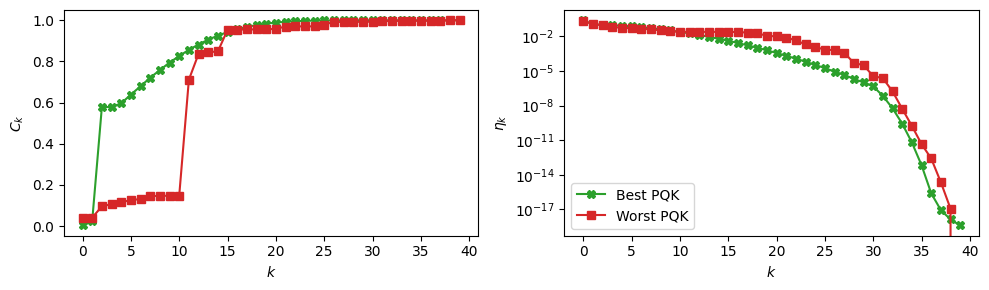

In [ ]:
kernel_tensor = [best_K_PQK, worst_K_PQK]
solution_list = [results_PQK.iloc[0]["f_sol"], results_PQK.iloc[-1]["f_sol"]]

marker = ["X-", "s-", "o-"]

labels = ["Best PQK", "Worst PQK"]

#two column plot axes
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
for idx_kernel, kernels in enumerate(kernel_tensor):
    K_f = kernels
    eigenvalue_spectrum, eigenvectors = eigendecomposition(K_f)    

    y_train_for_analytical = analytical_solutions[g_name_to_plot]
    if len(y_train_for_analytical.shape) == 1:
        y_train_for_analytical = y_train_for_analytical.reshape(-1, 1)

    #y_train is a column vector
    power = np.sum((eigenvectors.T @ y_train_for_analytical)**2, axis = 1)
    cumul = np.cumsum(power) / np.sum(power)


    axs[0].plot(cumul,marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    axs[0].set_ylabel("$C_k$")
    axs[0].set_xlabel("$k$")
    

    axs[1].plot(eigenvalue_spectrum, marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    axs[1].set_ylabel("$\eta_k$")
    axs[1].set_xlabel("$k$")
    axs[1].set_yscale("log")    


    #mean squared error as a function of x

    mse = (solution_list[idx_kernel] - analytical_solutions[g_name_to_plot])**2/ len(x_span)

    #axs[2].plot(x_span, mse, marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    #axs[2].set_ylabel("MSE")
    #axs[2].set_yscale("log")
    #axs[2].set_xlabel("x")


plt.tight_layout()
plt.legend()
